In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1292,2020-08-14,United Kingdom,315061.0,313798.0,46756.0,46706.0,1263.0,50.0
1293,2020-08-14,Germany,221080.0,221413.0,9223.0,9225.0,-333.0,-2.0
1294,2020-08-14,Iran,337461.0,336324.0,19218.0,19162.0,1137.0,56.0
1295,2020-08-14,Turkey,245440.0,245635.0,5905.0,5912.0,-195.0,-7.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4986.495759444872
RMSE =  18359.126495519573


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  283.93060909791825
RMSE =  676.7725326206671


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  31623.629032258064
RMSE =  56591.123413425434
-- World performances for deaths --
MAE =  1541.5967741935483
RMSE =  1888.6115312919785


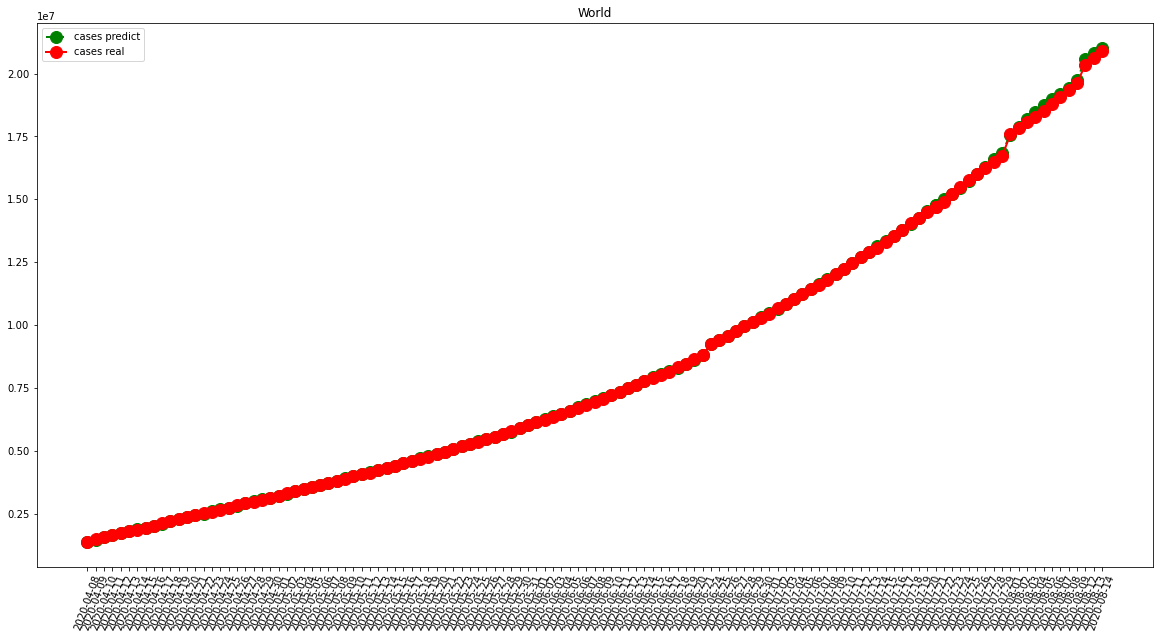

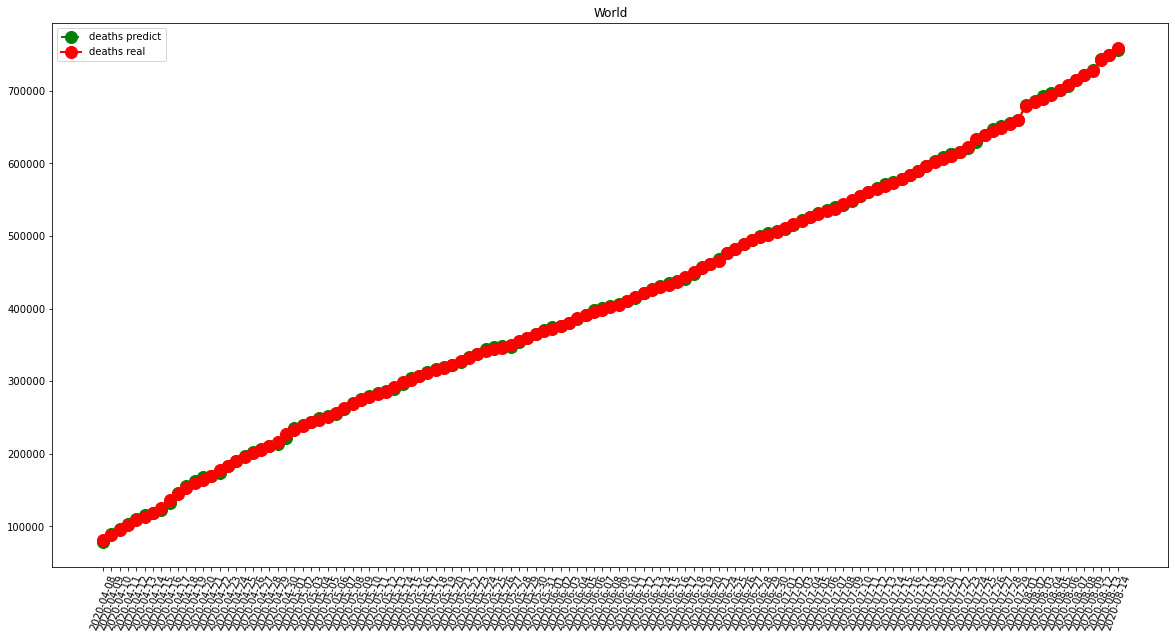

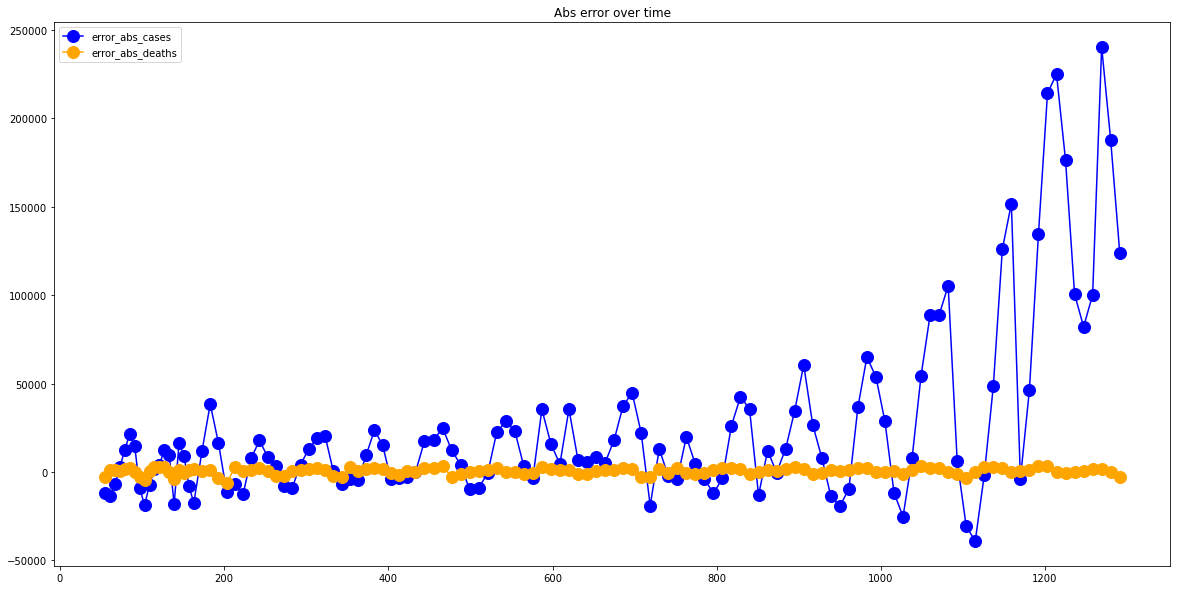

In [7]:
visShow("World")

-- France performances for cases --
MAE =  884.3805970149253
RMSE =  1372.6658859053641
-- France performances for deaths --
MAE =  136.6044776119403
RMSE =  289.6178258923764


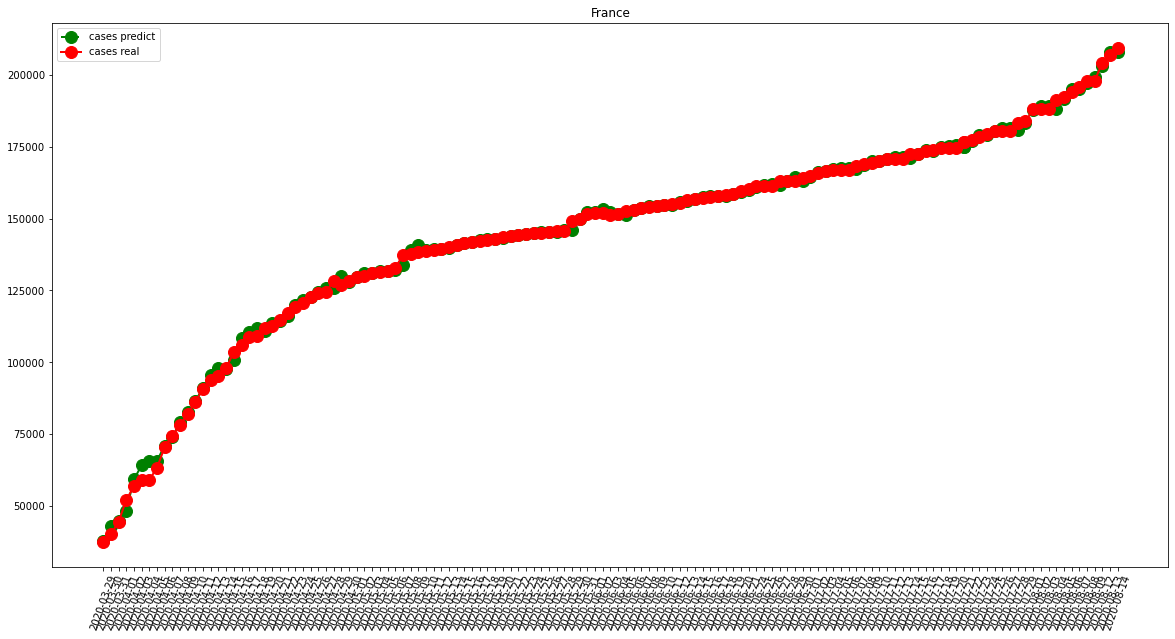

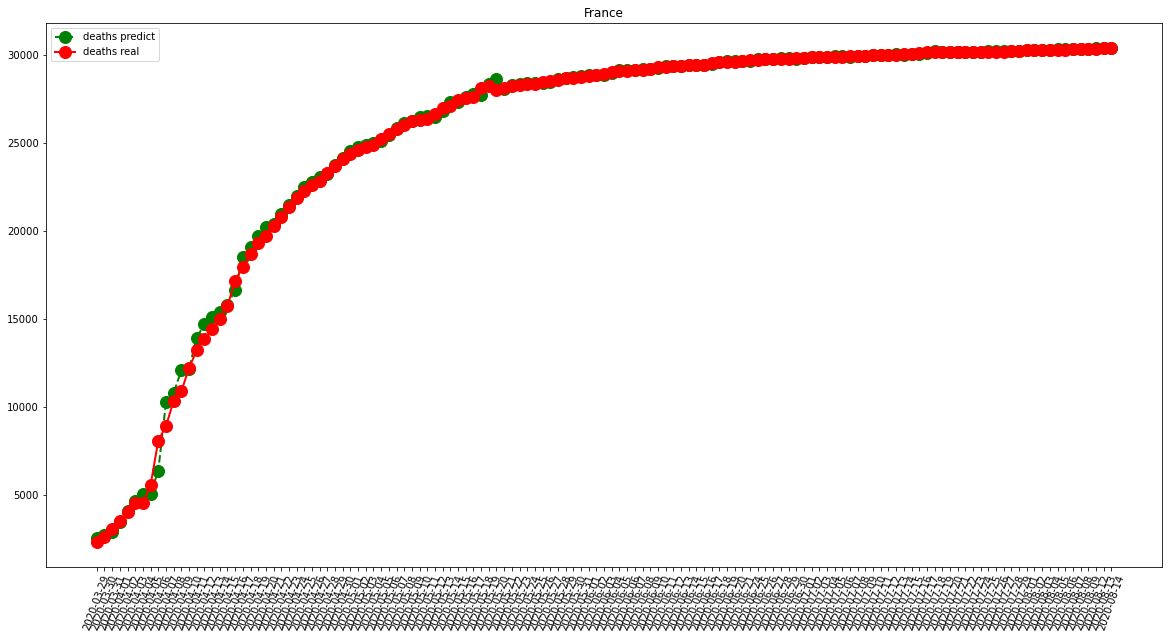

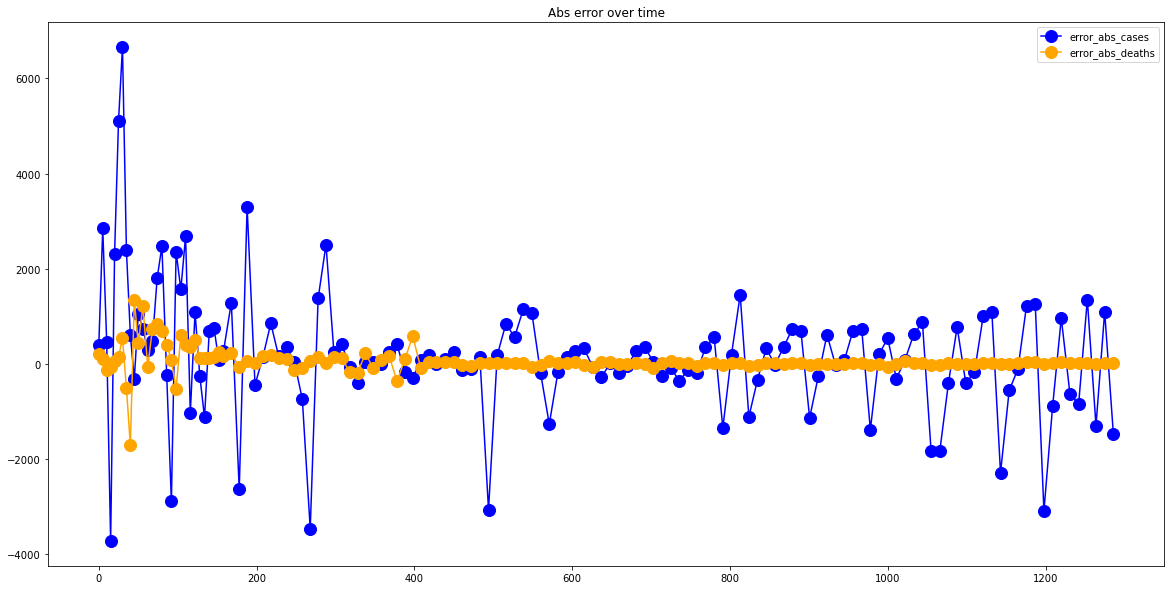

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  310.2985074626866
RMSE =  474.0851992199324
-- Italy performances for deaths --
MAE =  78.53731343283582
RMSE =  255.74763096902512


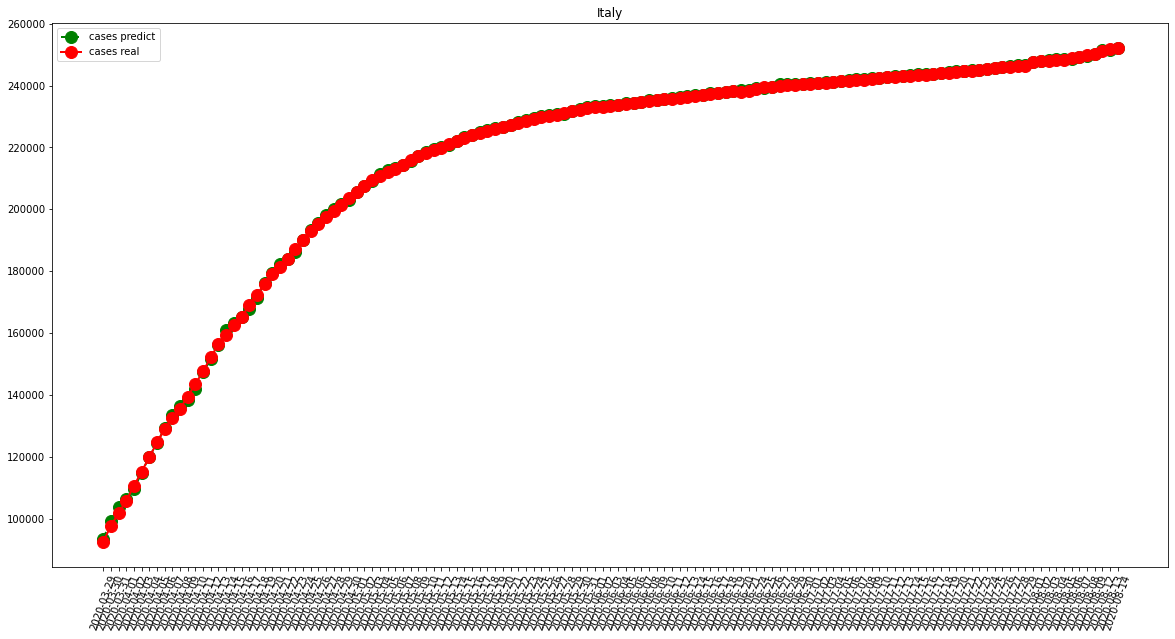

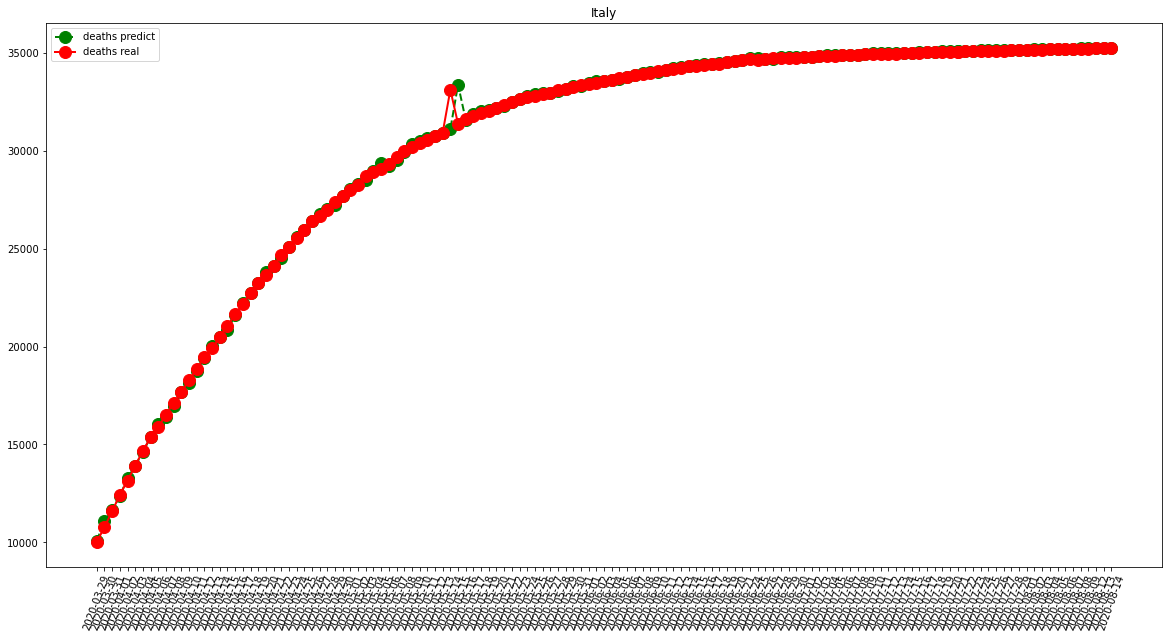

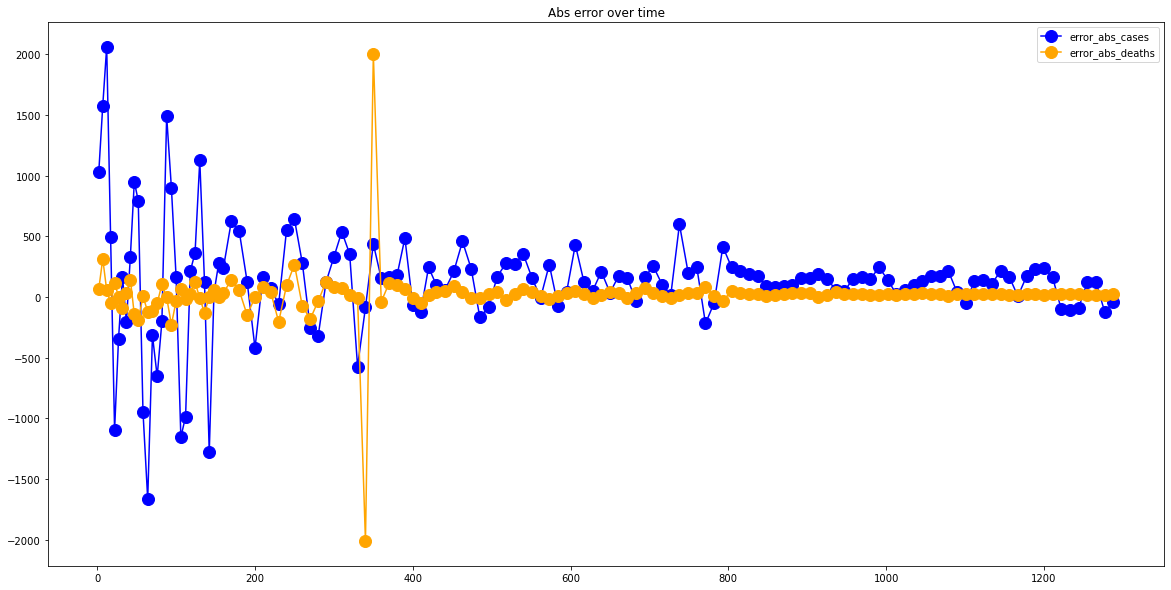

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1237.313432835821
RMSE =  2336.600062215669
-- Spain performances for deaths --
MAE =  139.00746268656715
RMSE =  350.7386342452722


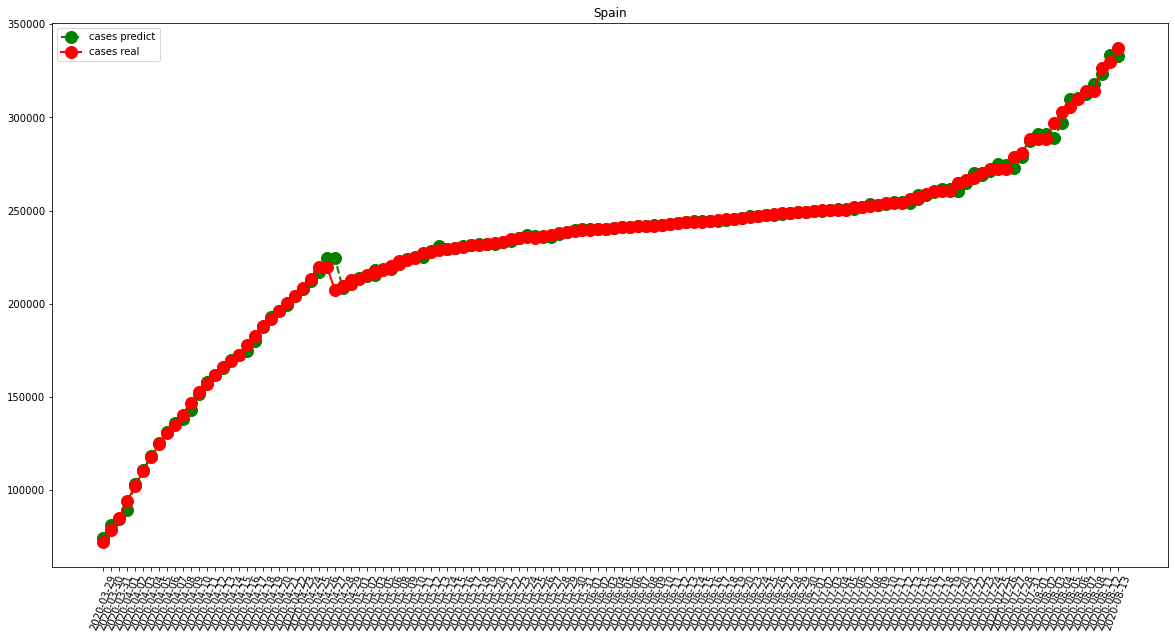

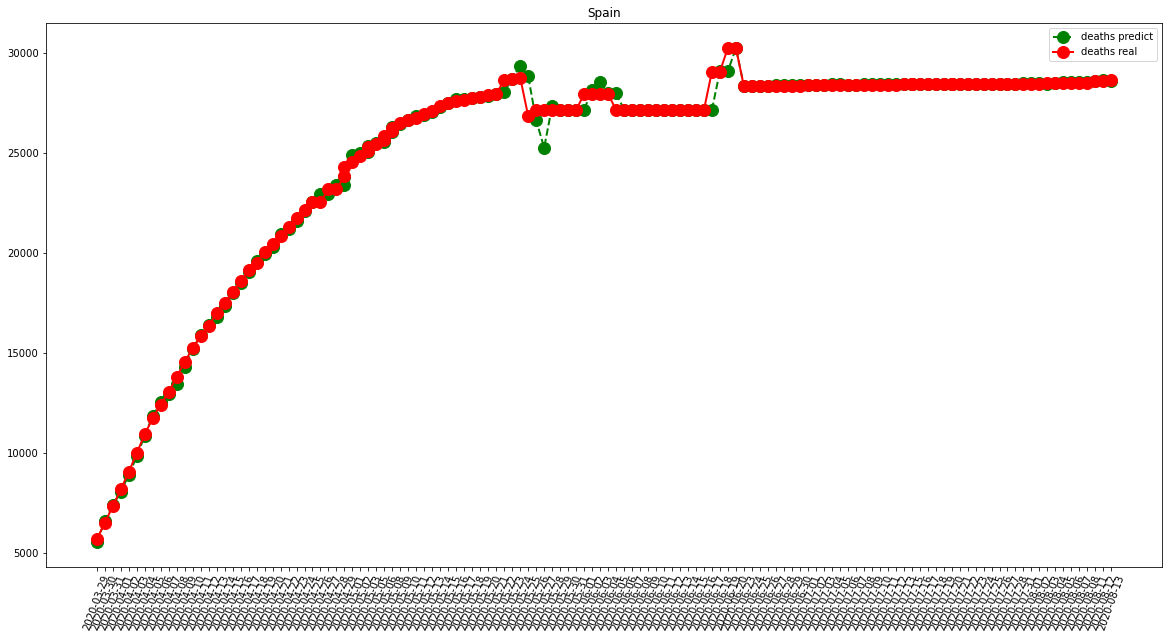

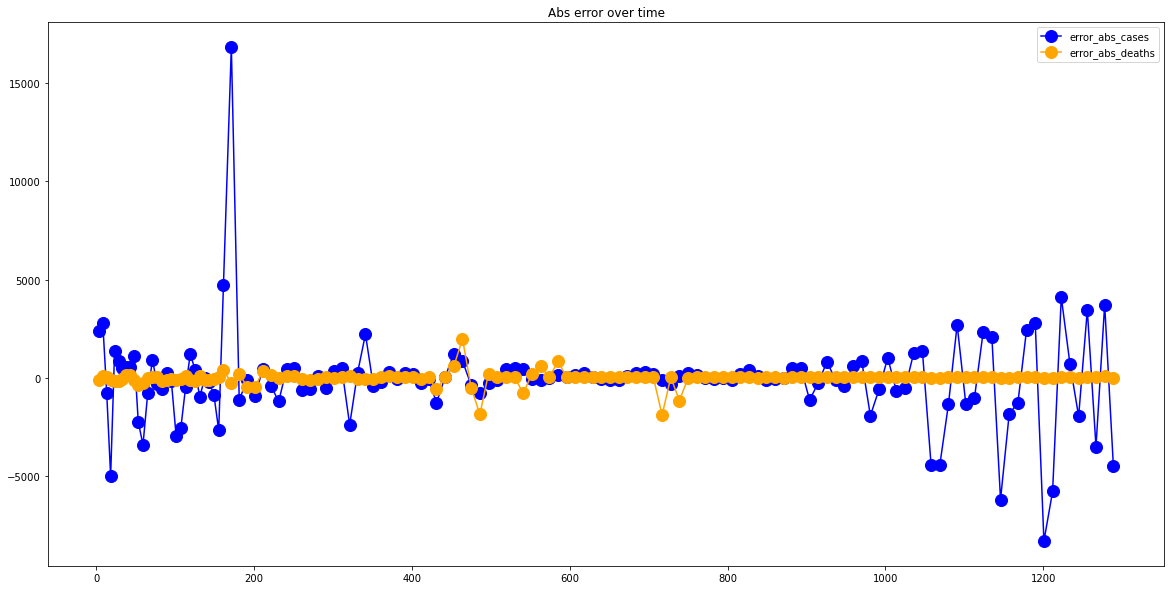

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  7786.835820895522
RMSE =  11564.2411589386
-- United States performances for deaths --
MAE =  498.9776119402985
RMSE =  714.2952951383037


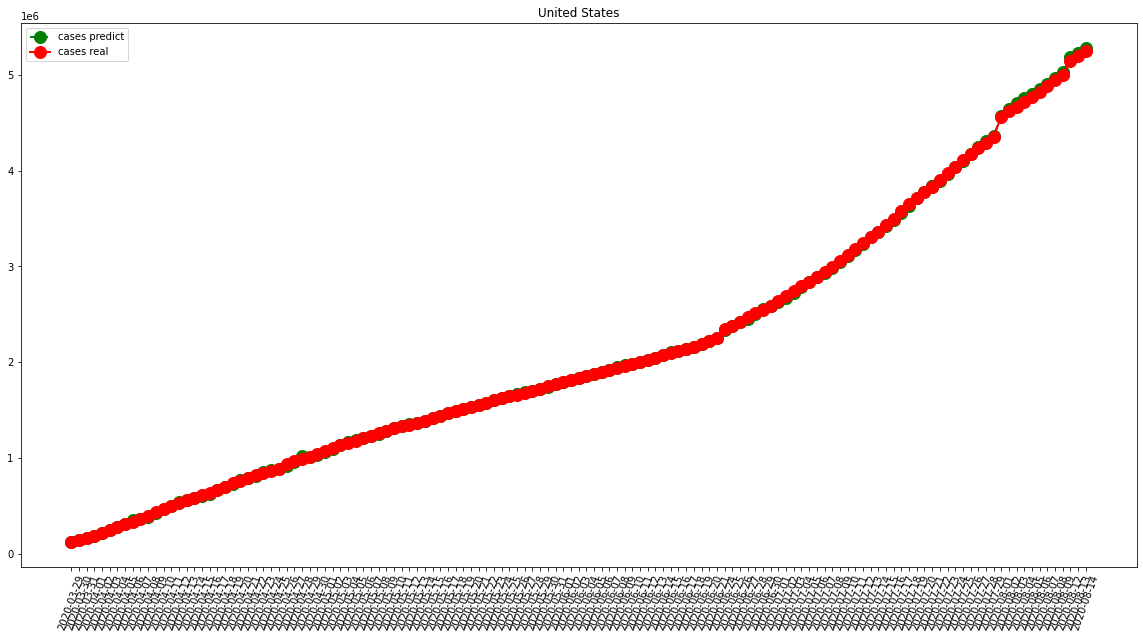

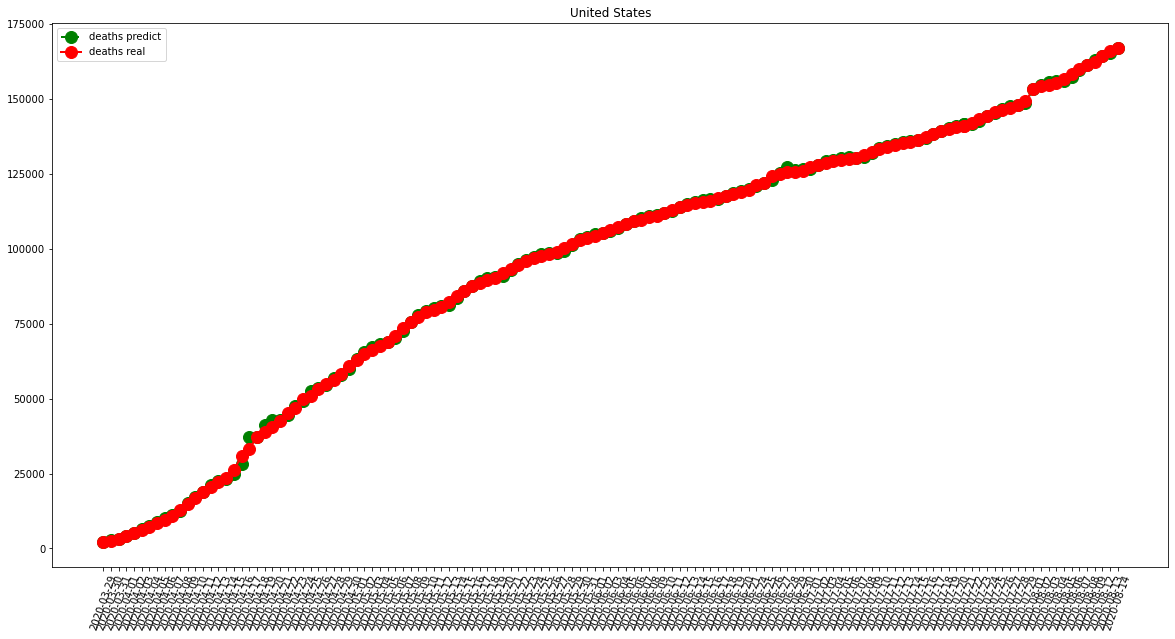

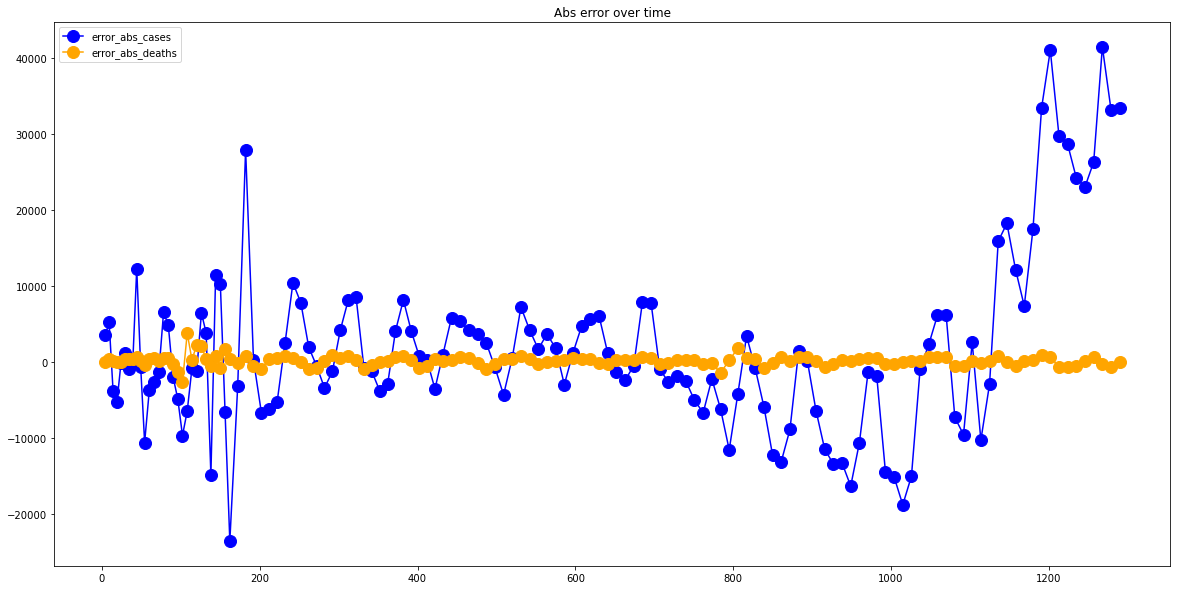

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  73.35074626865672
RMSE =  102.96952889373155
-- China performances for deaths --
MAE =  30.402985074626866
RMSE =  135.63190968711285


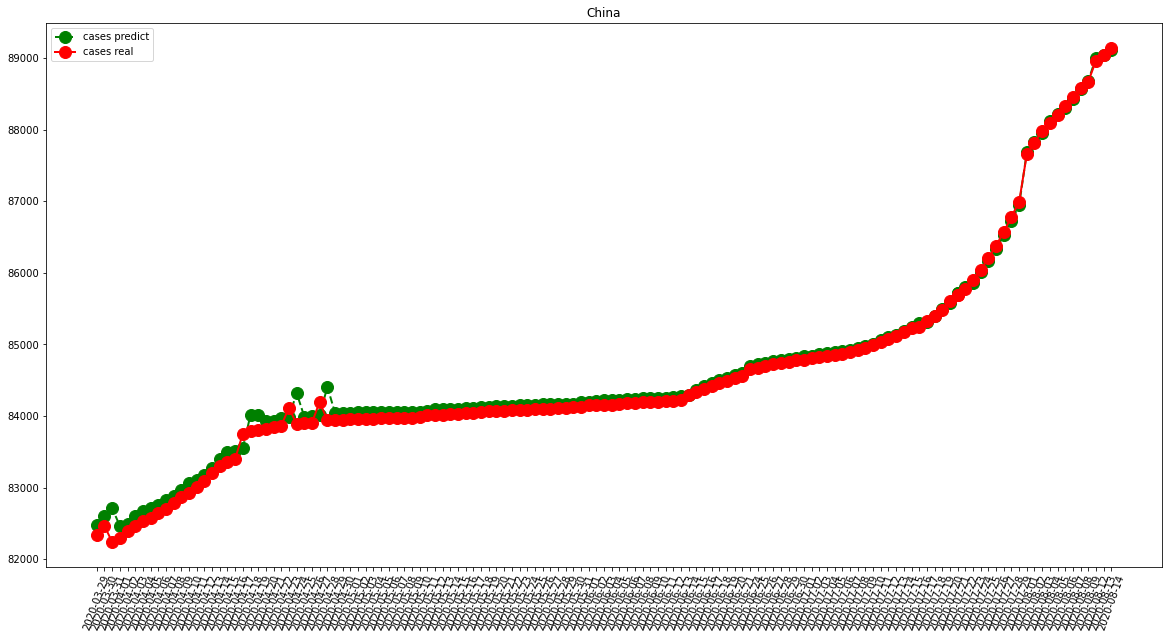

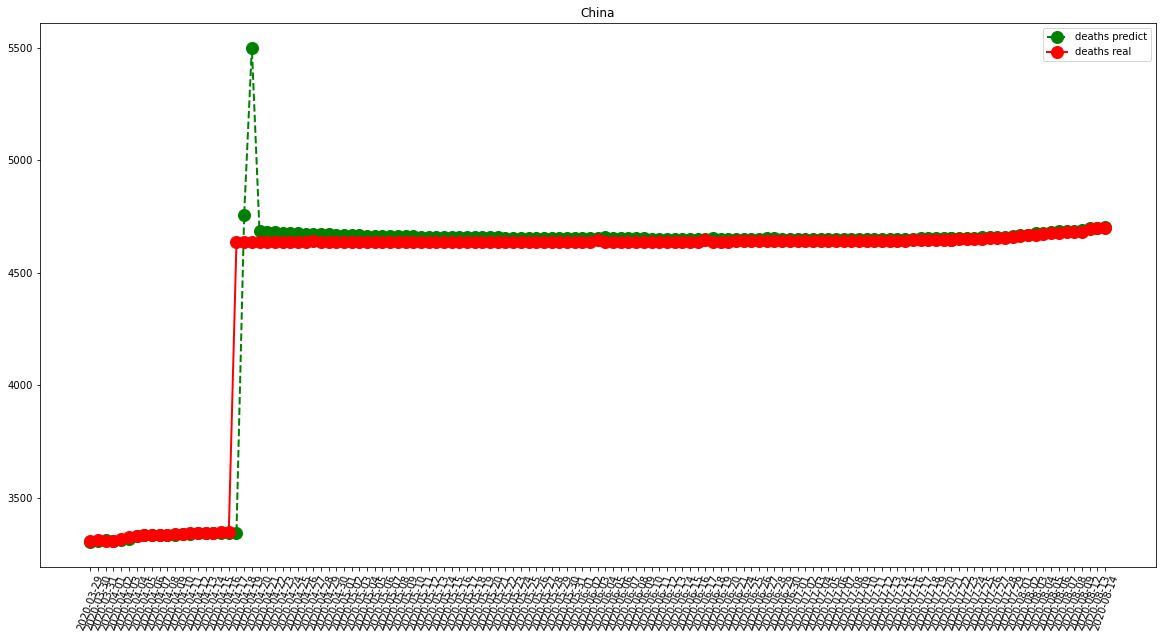

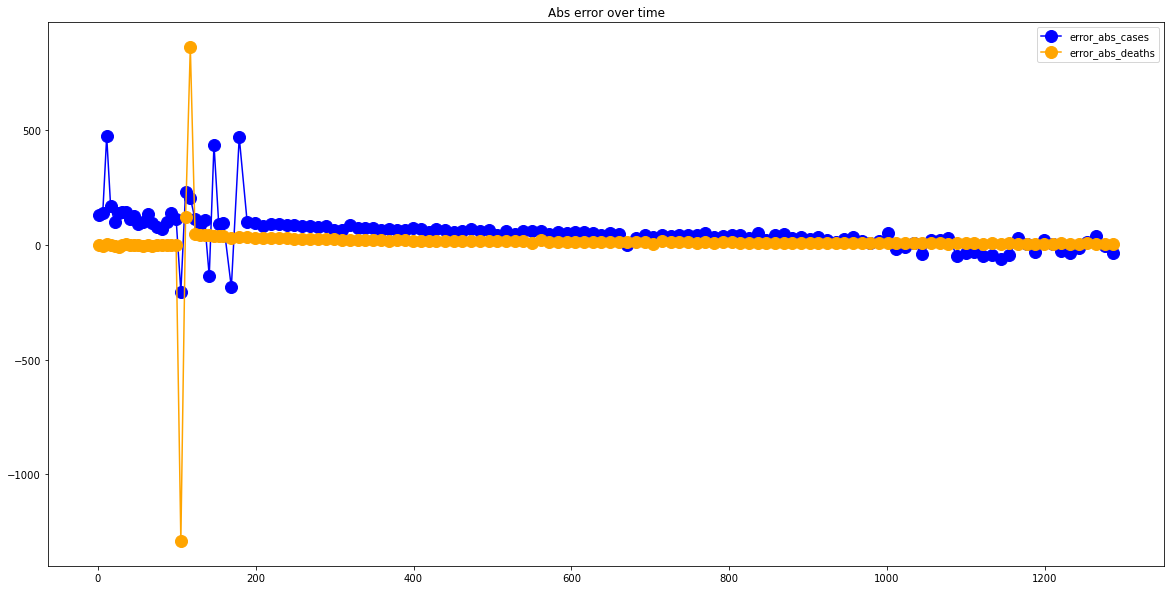

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1184.698113207547
RMSE =  4056.1481356224167
-- United Kingdom performances for deaths --
MAE =  187.10377358490567
RMSE =  477.40656499663555


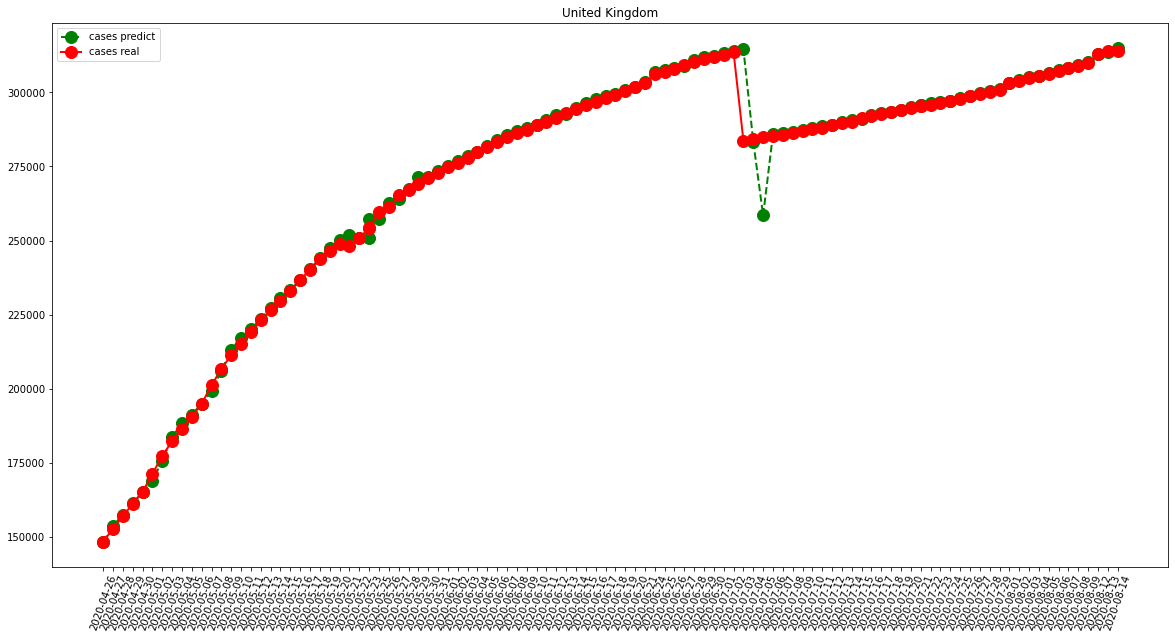

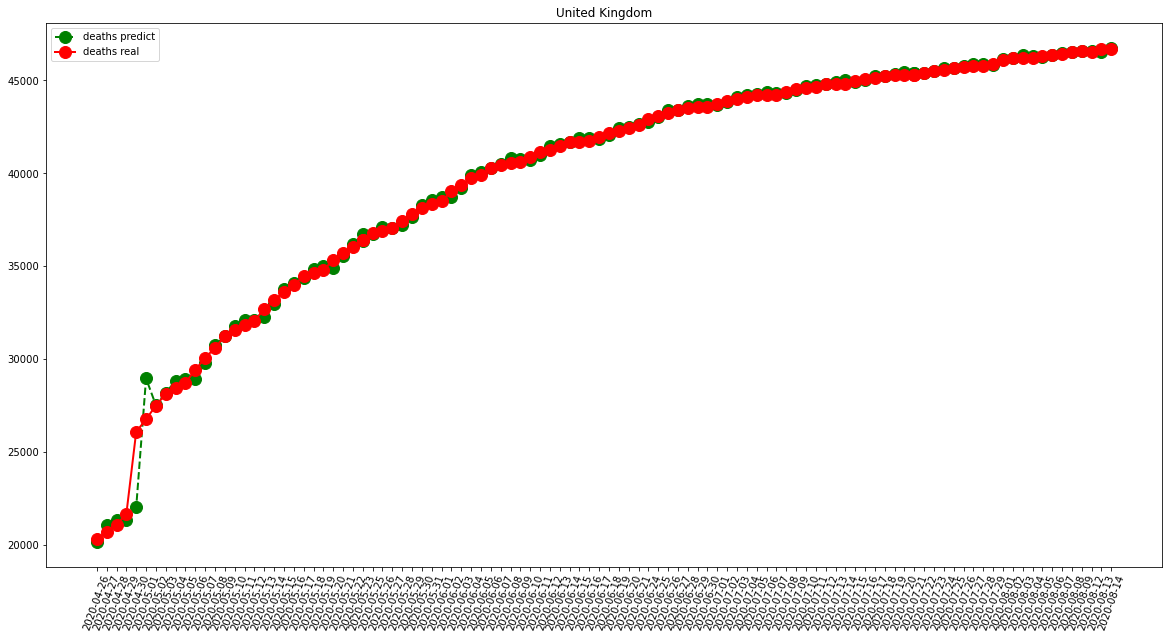

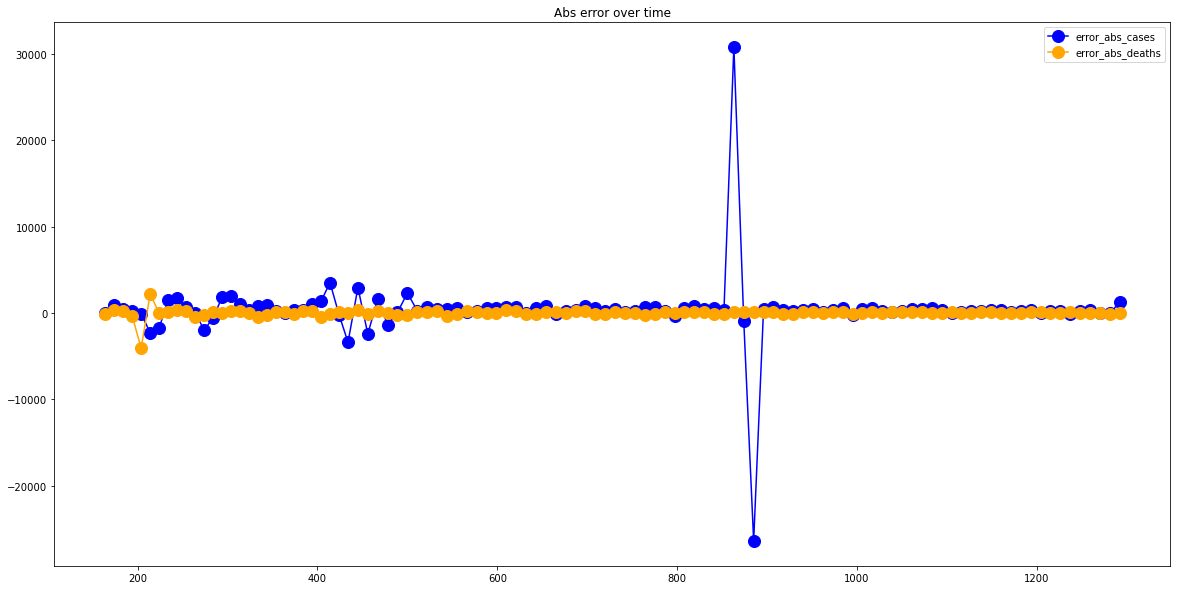

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  320.7830188679245
RMSE =  443.1160140265667
-- Germany performances for deaths --
MAE =  23.433962264150942
RMSE =  42.54520348550047


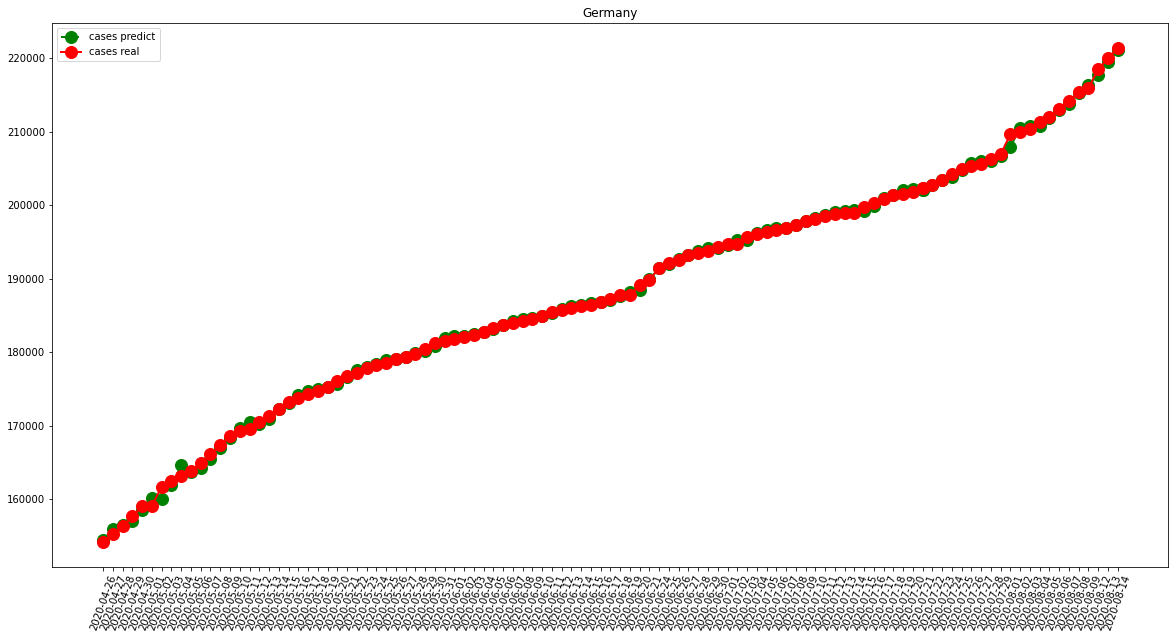

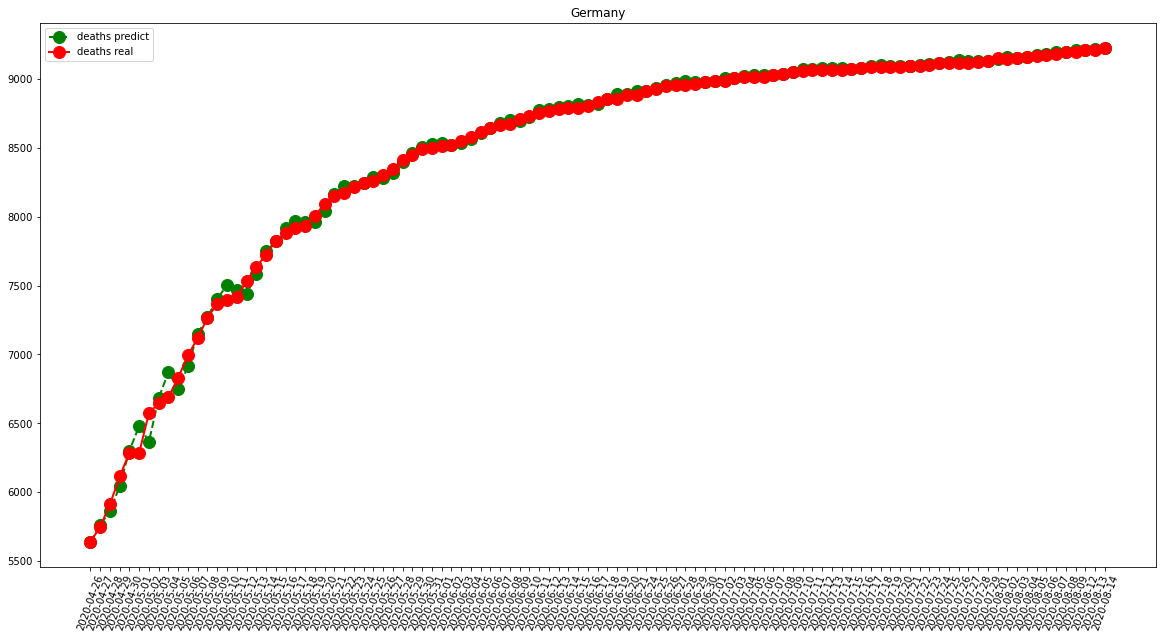

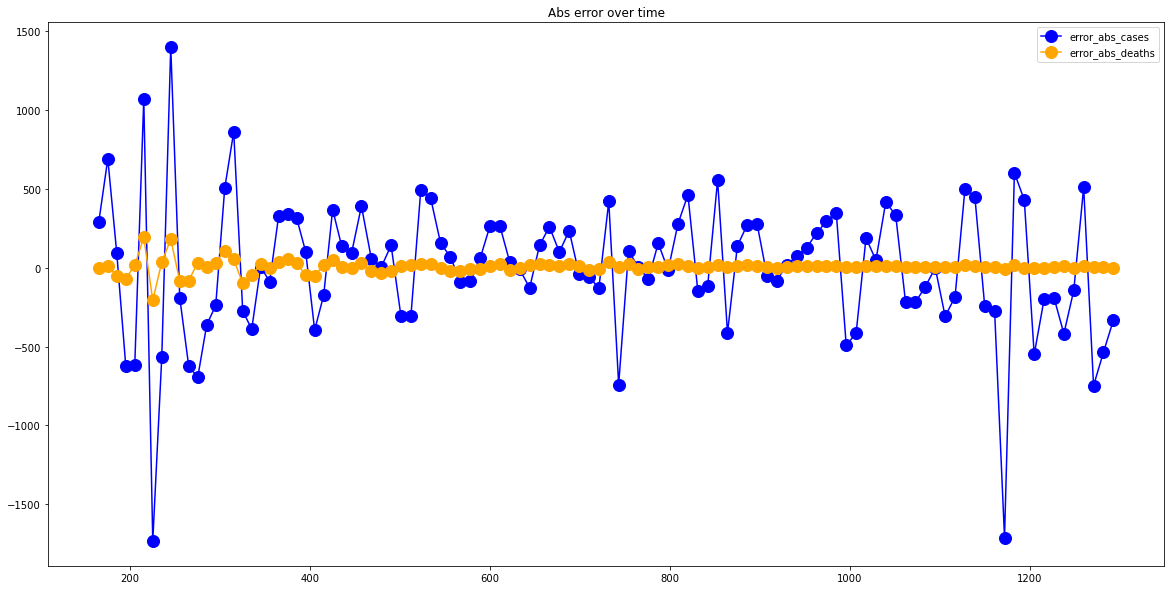

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  611.1698113207547
RMSE =  908.5657679645327
-- Iran performances for deaths --
MAE =  32.216981132075475
RMSE =  69.76300852522463


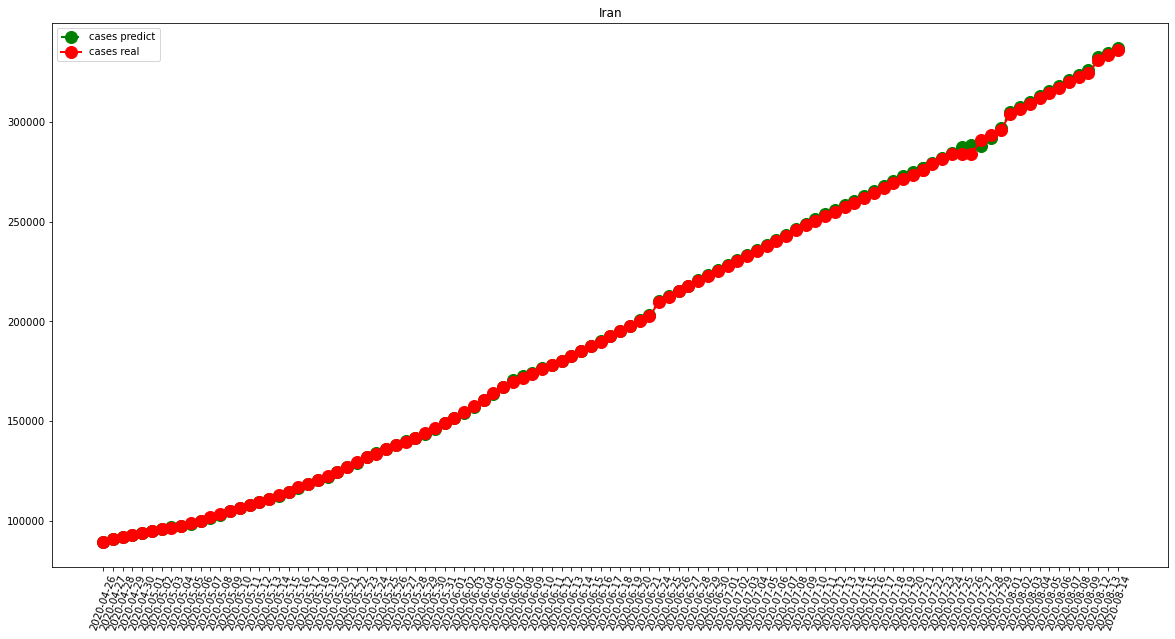

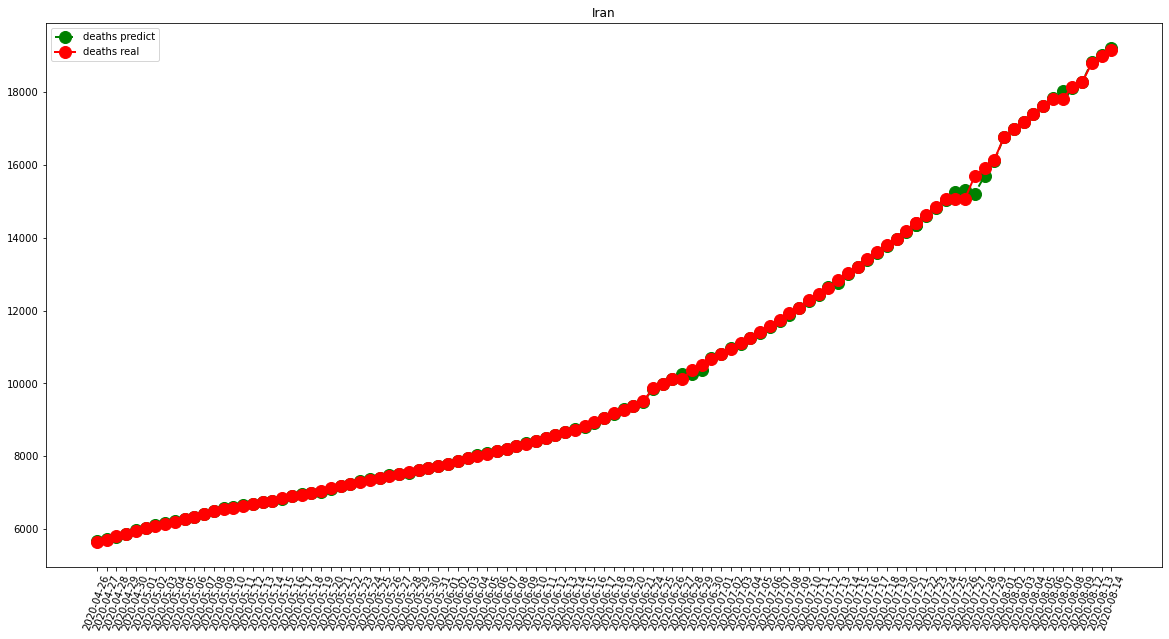

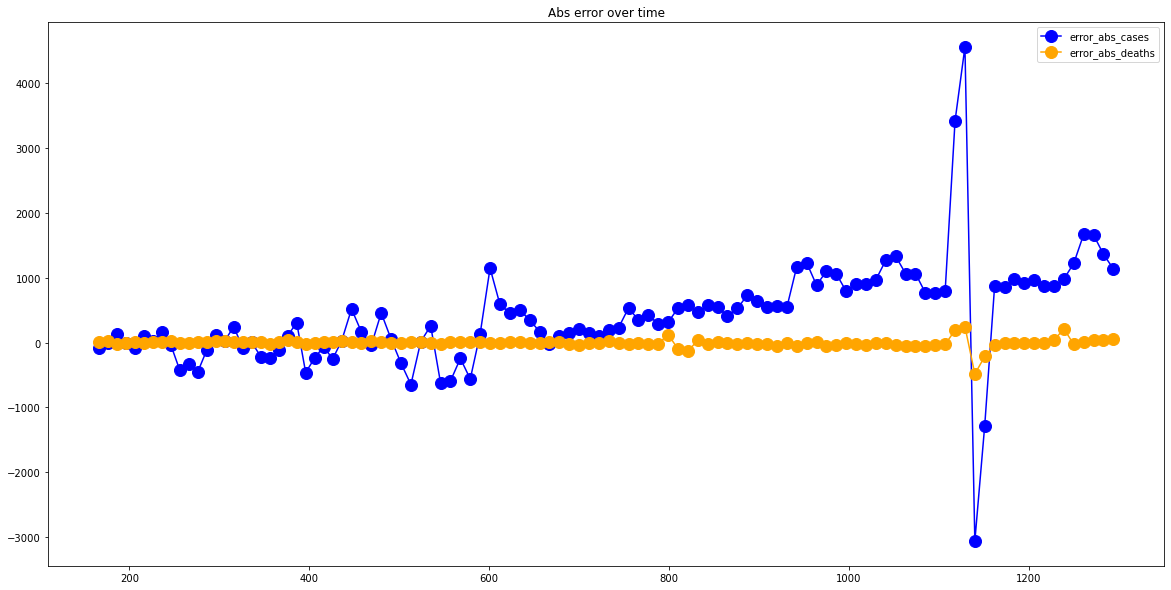

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  198.41509433962264
RMSE =  337.6643974170491
-- Turkey performances for deaths --
MAE =  18.09433962264151
RMSE =  98.60058555453975


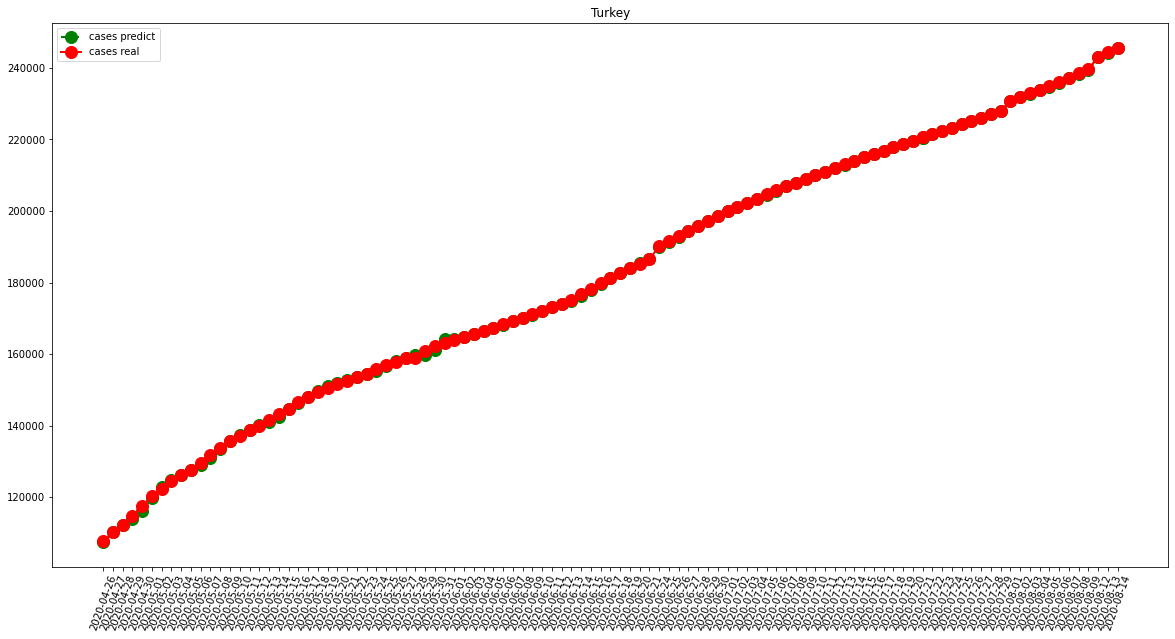

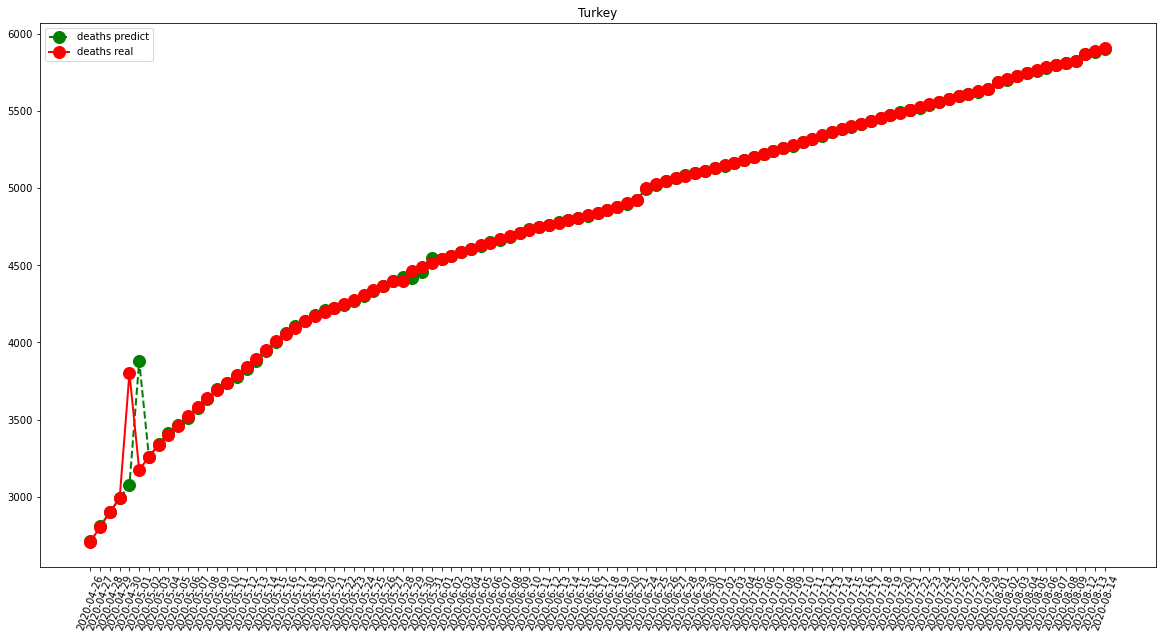

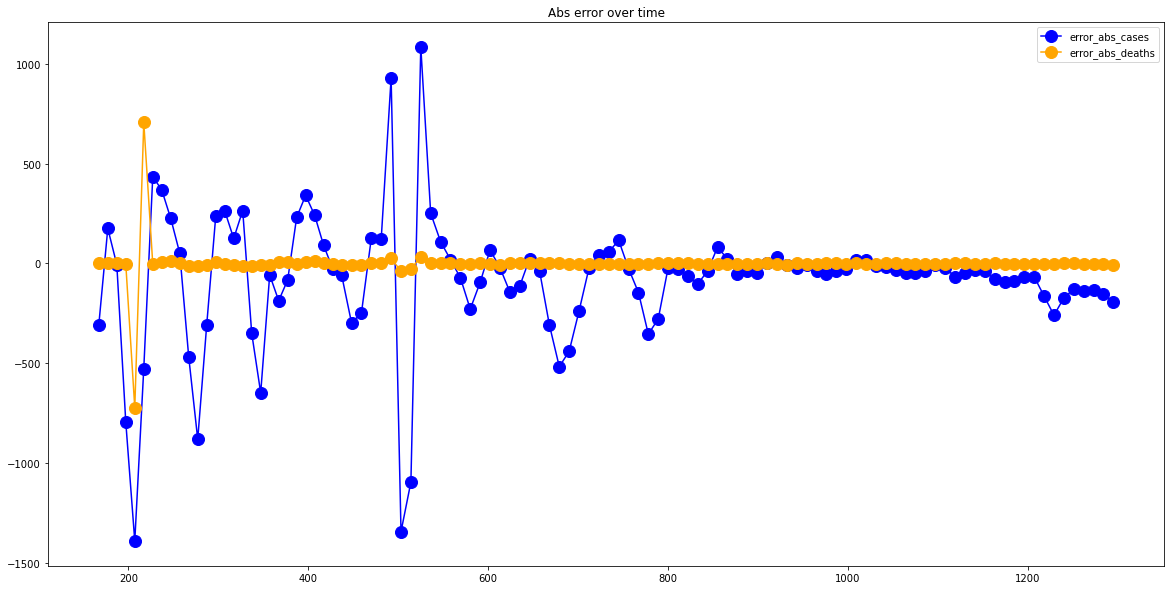

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11665.898734177215
RMSE =  15608.641022916712
-- Brazil performances for deaths --
MAE =  393.126582278481
RMSE =  484.4824590886206


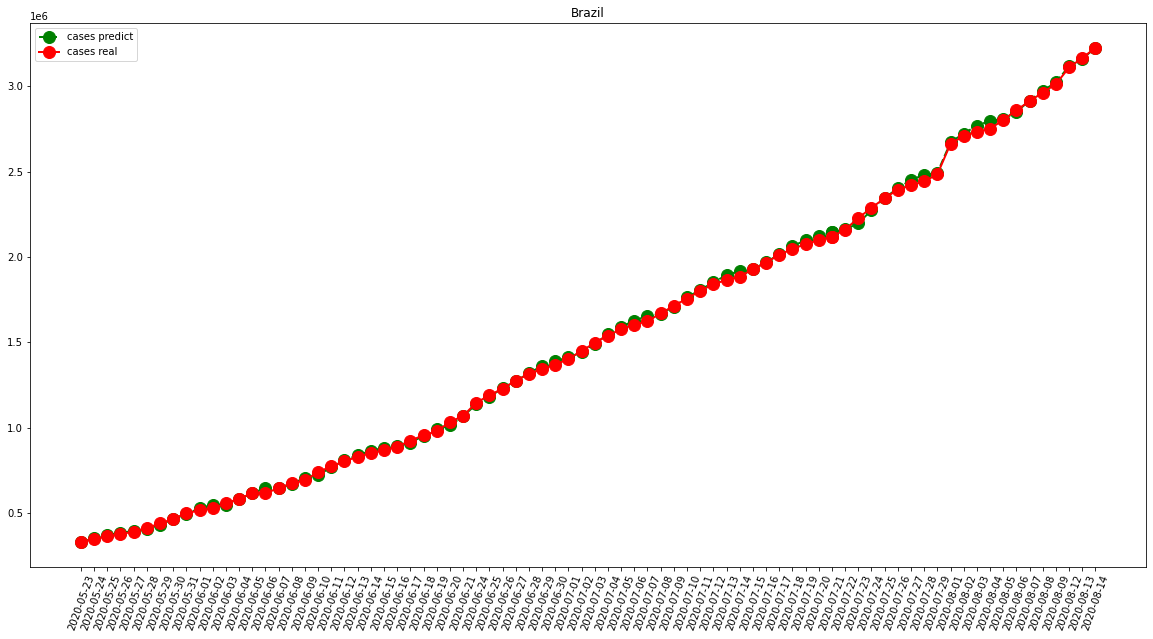

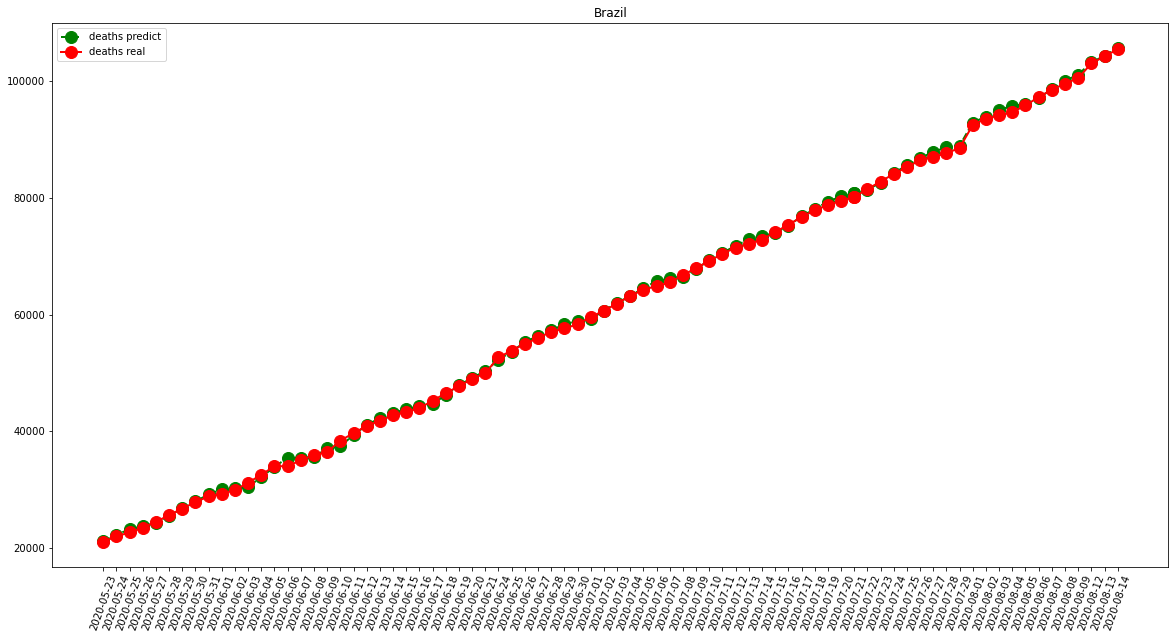

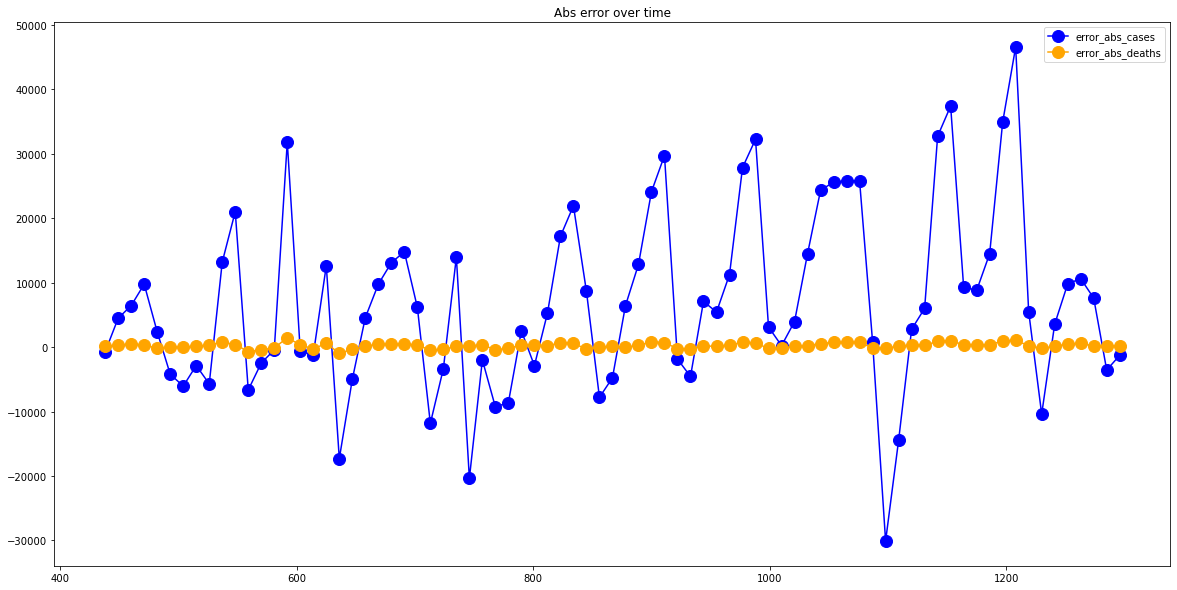

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)